<h1>Gráficos</h1>
<hr>

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

%matplotlib inline

<h3 style="color: tomato">Exercise 1:</h3>

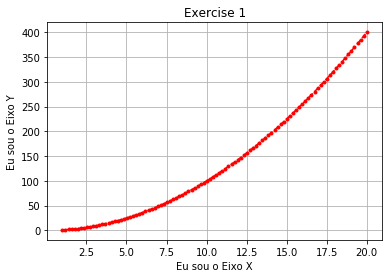

In [3]:
#números para criarmos o gráfico

x = np.linspace(1,20,100)
y = x**2

# Titulo gráfico

plt.title('Exercise 1')

# grid gráfico

plt.grid(True)

# nome dos eixos x e y .
plt.xlabel('Eu sou o Eixo X')
plt.ylabel('Eu sou o Eixo Y')

# linestyle ou ls - altera o tipo de linha
# color - altera as cores da linha
# marker - altera o tipo de marcador (circulos, triangulos, setas, etc)

plt.plot(x,y, 'go', color='red', ls='--', marker='.')

<h3 style="color: tomato">Exercise 2:</h3>

    Sim, pode ser usados, porém alguns parametros podem ser diferentes.
    Exemplos logo abaixo mostrarão algumas das diferenças

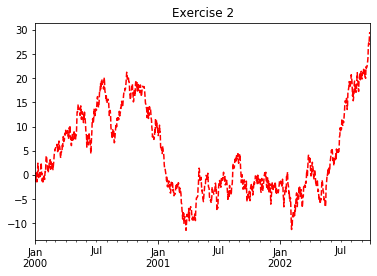

In [4]:
# gerando números aleatórios para criarmos o gráfico
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts.plot(style='--', color='red', title="Exercise 2")

<h3 style="color: tomato">Exercise 3:</h3>

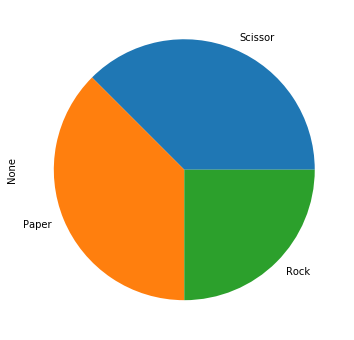

In [4]:
var = pd.Series(['Rock', 'Paper', 'Rock', 'Scissor', 'Paper', 'Paper', 'Scissor', 'Scissor'])

a = var.value_counts()

var.value_counts(normalize=True)*100




a.plot.pie(figsize=(6, 6))


    ### var.plot.pie() ###

    É gerado o seguinte erro:
        <' not supported between instances of 'str' and 'int'
        
    Isso significa que para fazer os gráficos são utilizadas condicionais entre números,
    ,nesse caso os valores são do tipo String, então, não é possivel, criar um comparativo.


<h3 style="color: tomato">Exercise 4:</h3>

In [7]:
df = pd.DataFrame({'massa': [0.330, 4.87 , 5.97],
                   'raio': [2439.7, 6051.8, 6378.1]},
                         index=['Mercúrio', 'Vênus', 'Terra'])


<h3 style="color: tomato">Exercise 5:</h3>


    devido a utilização pode-se obter interpretações erradas
    quanto aos dados analisados nos gráficos.

<h3 style="color: tomato">Exercise 6:</h3>

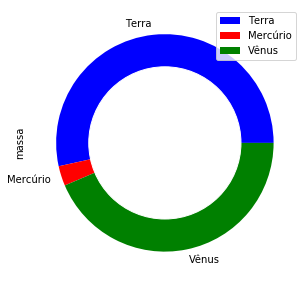

In [8]:
circulo=plt.Circle( (0,0), 0.7, color='white')

# Para alterar a ordem utiliza-se .reindex(['array', 'com', 'a', 'ordem', 'que', 'você', 'queira'])
# para alterar as cores basta utilizar o argumento colors e passar um array de strings com as cores
df.reindex(["Terra", "Mercúrio", "Vênus"]).plot.pie(y='massa', figsize=(5, 5), colors=['blue', 'red', 'green'])

p=plt.gcf()
p.gca().add_artist(circulo)

<h3 style="color: tomato">Exercise 7:</h3>

    A priore fica em evidencia, que o segundo e terceiro gráficos possuem uma chance muito maior de induzir ao erro
    visto que a escala muda,além de que certas vezes deve-se ficar comparando os dois gráficos para se obter uma informação, as barras juntas ajuda nessa comparação.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x049CDBD0>,
      dtype=object)

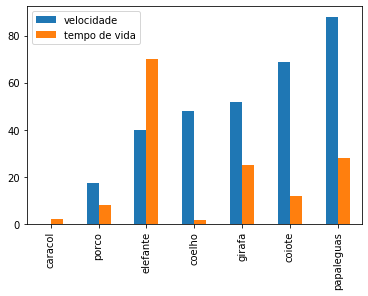

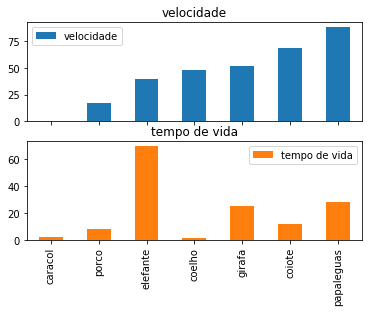

In [9]:
df = pd.DataFrame({'velocidade': [0.1, 17.5, 40, 48, 52, 69, 88],
                   'tempo de vida': [2, 8, 70, 1.5, 25, 12, 28]},
     index=['caracol', 'porco', 'elefante', 'coelho', 'girafa', 'coiote', 'papaleguas'])



df.plot.bar()
df.plot.bar(subplots=True)

<h3 style="color: tomato">Exercise 8:</h3>

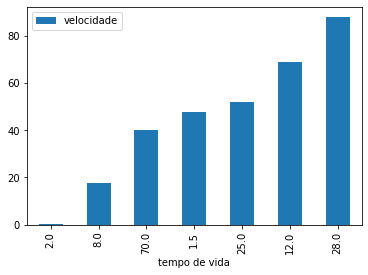

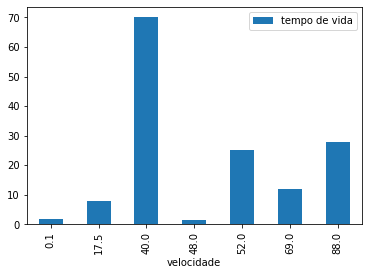

In [10]:
# quando fazemos

df.plot.bar(y="velocidade", x='tempo de vida')

# estamos definindo o eixo y com os valores obtidos da coluna velocidade
# e estamos definindo o eixo x com os valores obtidos da coluna tempo de vida

# Já quando fazemos
df.plot.bar(y="tempo de vida", x='velocidade')

# estamos invertendo os eixos x e y (em relação ao exemplo anterior)

<h3 style="color: tomato">Exercise 9:</h3>

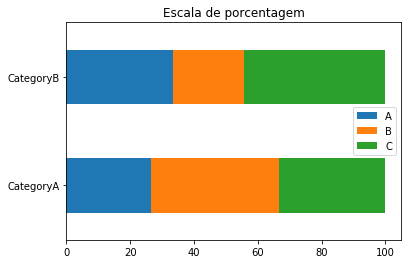

In [11]:
# Dados criados
dft = pd.DataFrame({'CategoryA': {'A': 4, 'B': 6, 'C': 5},
                    'CategoryB': {'A': 3, 'B': 2, 'C': 4}})

# transformando em relativos
dft['CategoryA'] = list(map(lambda x: round(x / sum(dft['CategoryA']) * 100,2), dft['CategoryA']))
dft['CategoryB'] = list(map(lambda x: round(x / sum(dft['CategoryB']) * 100,2), dft['CategoryB']))

#invertendo o index e as colunas
dft = dft.T

dft.plot.barh(stacked=True, title='Escala de porcentagem')

<h3 style="color: tomato">Exercise 10:</h3>

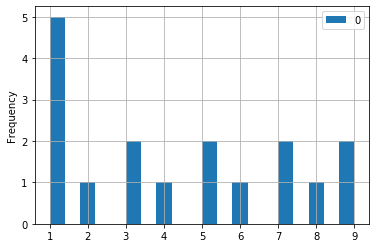

In [12]:
# Gerando dados
df10 = pd.DataFrame([1,2,3,4,5,6,7,8,9,9,7,5,3,1,1,1,1])

# gerando o gráfico
df10.plot.hist(bins=20, grid=True)



    o eixo Y número de frequencia 
    e o eixo X valores propriamente ditos

<h3 style="color: tomato">Exercise 11:</h3>

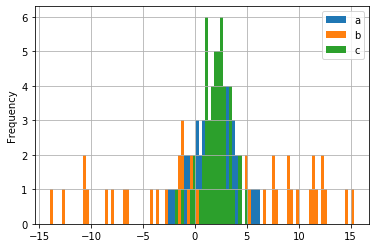

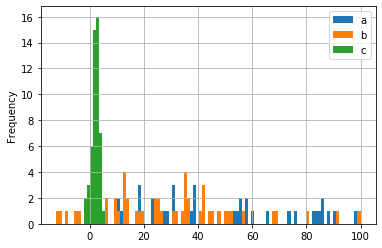

In [16]:
#Dados
df11 = pd.DataFrame({'a': np.random.randn(50) + 1, 'b': np.random.randn(50),
 'c': np.random.randn(50) - 1}, columns=['a', 'b', 'c'])

# Gerando os dados relativos
df11['a'] = list(map(lambda x: round((x/sum(df11['a']))*100 ,2), df11['a']))
df11['b'] = list(map(lambda x: round((x/sum(df11['b']))*100 ,2), df11['b']))
df11['c'] = list(map(lambda x: round((x/sum(df11['c']))*100 ,2), df11['c']))

# Gera o Gráfico com a frequencia relativa
df11.plot.hist(bins=100, grid=True)

# esta função cria uma lista com os valores absolutos e relativos
# porém acumulativos, onde cada valor é somado ao seu anterior.
def serieCumulativa(x):
    lista = list()
    
    for element in x:
        if len(lista) == 0:
            lista.append(element)
        else:
            v = element + lista[-1]
            if ( v > 100 ):
                v = 100
            lista.append(v)
    return(lista)

df11['a'] = serieCumulativa(df11['a'])
df11['b'] = serieCumulativa(df11['b'])

# Gera o Gráfico com a frequencia relativa acumulada
df11.plot.hist(bins=100, grid=True)

<h3 style="color: tomato">Exercise 12:</h3>

In [18]:
# Fim Exercicio